# 롯데의 고객은 누구일까? 페르소나 찾기_ 롯데 온라인 고객 분석
### 제 5회 L.POINT Big Data Competition
#### 온라인 행동 데이터 기반으로 구매자의 특성을 분류하여 롯데 그룹 온라인 계열사의 페르소나를 선정하고 시각화를 통한 인사이트 도출
#### -> 롯데의 온라인 구매 고객 핵심 타겟층의 니즈와 특성을 파악해 향후 마케팅 전략에 반영 가능한 분석 자료로 활용 가능

## 1. Library & Data Import

In [208]:
import pandas as pd
import numpy as np
from pprint import pprint as pp
from inspect import signature
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')

%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

Unable to locate an executable at "/Library/Java/JavaVirtualMachines/jdk1.8.0_271.jdk/Contents/Home/bin/apt" (-1)


## 2. EDA 탐색적 데이터 분석
### 2-1. 데이터 셋 기본 정보 파악

#### Law Data Set Summary : 분석 데이터 구성 _ 온라인 행동 데이터 영역 & 상품 분류 체계 영역
- Custom : 고객 정보 (고객의 인구통계학적 특징)
- Session : 세션 (고객 온라인 행동 데이터)
- Product : 주문 (상품 특징별 주문 금액, 횟수)
- Master : 상품 정보 (상품 분류별 고객 니즈)
- Search1 : 검색어1 (검색&구매 상관관계, 키워드)
- Search2 : 검색어2 (분석 데이터 기간 내 일별&검색어별 검색량)

### 2-1-1. Custom Data

In [209]:
df_cus = pd.read_csv('./Custom.csv')

In [210]:
pp( df_cus.info() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671679 entries, 0 to 671678
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   CLNT_ID      671679 non-null  int64 
 1   CLNT_GENDER  671679 non-null  object
 2   CLNT_AGE     671679 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 15.4+ MB
None


In [211]:
df_cus.head()

,CLNT_ID,CLNT_GENDER,CLNT_AGE
0,4830726,F,30
1,4830874,F,40
2,4830975,F,30
3,4831275,F,30
4,4825325,F,30


In [212]:
#고객 정보 데이터 기초 통계

#고객 연령대별 및 성별 볼륨 파악

print(df_cus['CLNT_AGE'].value_counts())
print('---------------------------------------')
print(df_cus['CLNT_GENDER'].value_counts())

30    313600
40    216217
20     95297
50     36624
60      5256
10      3807
70       846
80        32
Name: CLNT_AGE, dtype: int64
---------------------------------------
F    570616
M    101063
Name: CLNT_GENDER, dtype: int64


In [213]:
#고객 연령대에 따른 성별 볼륨 파악

df_ages = df_cus.groupby( ['CLNT_AGE', 'CLNT_GENDER'] )['CLNT_GENDER'].count()
df_ages

CLNT_AGE  CLNT_GENDER
10        F                3007
          M                 800
20        F               82269
          M               13028
30        F              271712
          M               41888
40        F              180398
          M               35819
50        F               28881
          M                7743
60        F                3784
          M                1472
70        F                 542
          M                 304
80        F                  23
          M                   9
Name: CLNT_GENDER, dtype: int64

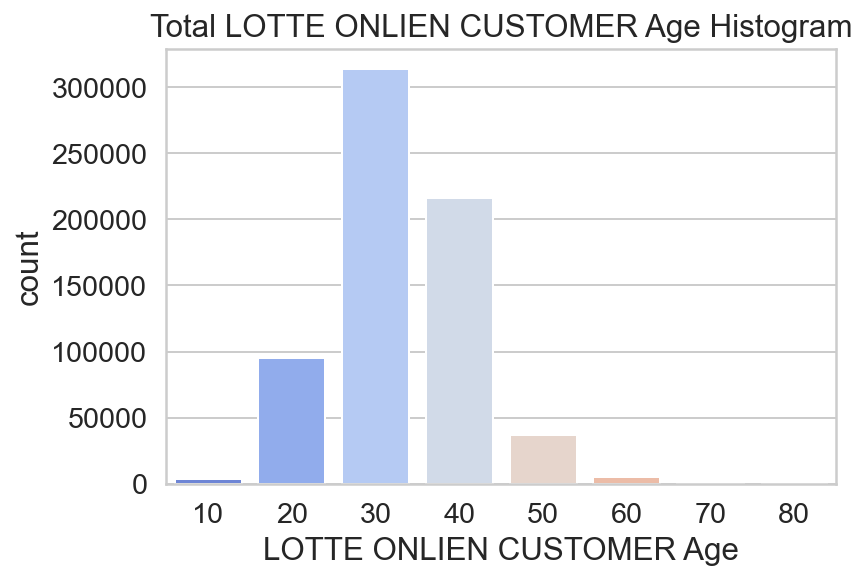

In [214]:
#데이터 시각화
#고객 연령대 확인

sns.set_style('whitegrid')

grid = plt.subplots() 

grid = sns.countplot('CLNT_AGE', data=df_cus, palette='coolwarm')
grid.set_title('Total LOTTE ONLIEN CUSTOMER Age Histogram')
grid.set_xlabel('LOTTE ONLIEN CUSTOMER Age')

plt.show()

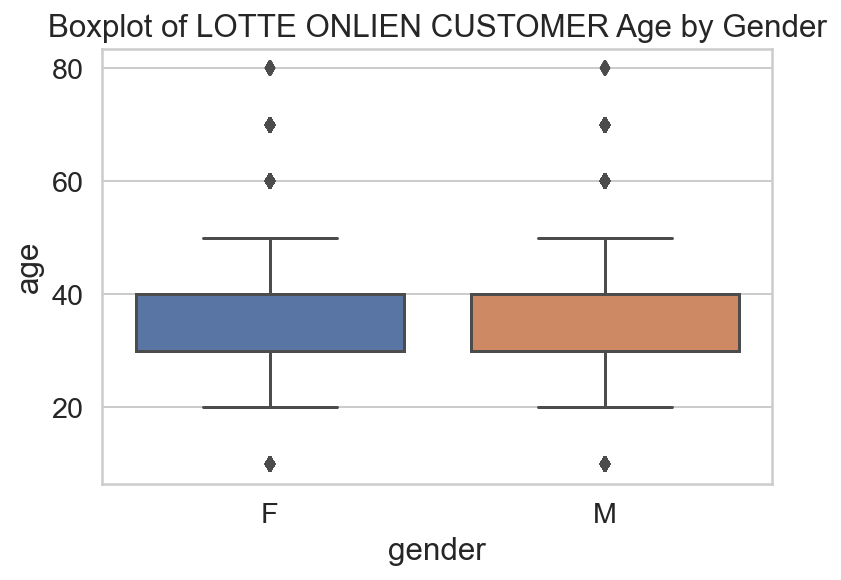

In [215]:
#데이터 시각화
#고객 성별 비중 확인

grid = plt.subplots()

grid = sns.boxplot(x='CLNT_GENDER', y='CLNT_AGE', data=df_cus)
grid.set_title('Boxplot of LOTTE ONLIEN CUSTOMER Age by Gender')
grid.set_xlabel('gender')
grid.set_ylabel('age')

plt.show()

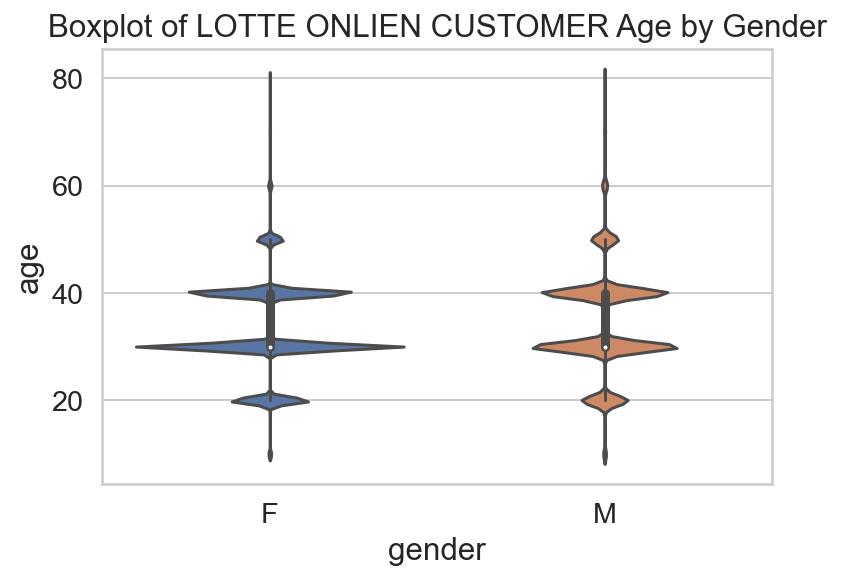

In [216]:
#데이터 시각화
#고객 성별 비중 확인

grid = plt.subplots()

grid = sns.violinplot(x='CLNT_GENDER', y='CLNT_AGE', data=df_cus)
grid.set_title('Boxplot of LOTTE ONLIEN CUSTOMER Age by Gender')
grid.set_xlabel('gender')
grid.set_ylabel('age')

plt.show()

### 2-1-2. Session Data

In [217]:
df_sess = pd.read_csv('./Session.csv')

In [218]:
pp( df_sess.info() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2712907 entries, 0 to 2712906
Data columns (total 9 columns):
 #   Column           Dtype  
---  ------           -----  
 0   CLNT_ID          int64  
 1   SESS_ID          int64  
 2   SESS_SEQ         int64  
 3   SESS_DT          int64  
 4   TOT_PAG_VIEW_CT  float64
 5   TOT_SESS_HR_V    object 
 6   DVC_CTG_NM       object 
 7   ZON_NM           object 
 8   CITY_NM          object 
dtypes: float64(1), int64(4), object(4)
memory usage: 186.3+ MB
None


In [219]:
df_sess.head()

,CLNT_ID,SESS_ID,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM
0,5873599,8641867,9,20180509,82.0,"1,890",mobile,Daejeon,Daejeon
1,5873599,6616320,21,20180611,105.0,"1,604",mobile,Busan,Busan
2,5873599,5886172,40,20180624,41.0,632,mobile,Daejeon,Daejeon
3,5873884,1050889,15,20180913,160.0,"1,035",mobile,Gyeonggi-do,Anyang
4,5874461,10298270,5,20180412,13.0,298,mobile,Seoul,Seoul


### 2-1-3. Product Data

In [220]:
df_prod = pd.read_csv('./Product.csv')

In [221]:
df_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5024906 entries, 0 to 5024905
Data columns (total 8 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   CLNT_ID    int64 
 1   SESS_ID    int64 
 2   HITS_SEQ   int64 
 3   PD_C       int64 
 4   PD_ADD_NM  object
 5   PD_BRA_NM  object
 6   PD_BUY_AM  object
 7   PD_BUY_CT  object
dtypes: int64(4), object(4)
memory usage: 306.7+ MB


In [222]:
df_prod.head()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT
0,4139680,7605037,12,642112,색상:워터멜론,[바비브라운],"39,000",1
1,4140076,10189797,13,570603,색상:BLK0_(BLK0)BLACK|사이즈:120 / 2개,데상트,"39,000",2
2,4142395,6158159,85,179538,(not set),[아베다],"39,000",1
3,4144914,7935714,12,554336,색상:블랙|사이즈:160cm(12~13세) / 1개,아디다스 키즈,"39,000",1
4,4144917,6406509,78,190306,5개,데코르테,"39,000",5


### 2-1-4. Master Data

In [223]:
df_mast = pd.read_csv('./Master (2).csv')

In [224]:
df_mast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847652 entries, 0 to 847651
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   PD_C      847652 non-null  int64 
 1   PD_NM     847652 non-null  object
 2   CLAC1_NM  847652 non-null  object
 3   CLAC2_NM  847652 non-null  object
 4   CLAC3_NM  847652 non-null  object
dtypes: int64(1), object(4)
memory usage: 32.3+ MB


In [225]:
df_mast.head()

,PD_C,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM
0,64382,언더아머 남성 UA HG 아머 모크 LS 1289559-001 - 블랙 / MD[95],스포츠패션,남성일반스포츠의류,남성스포츠티셔츠
1,62282,여자 플라워덧신 2족선물세트 17403-2set,속옷/양말/홈웨어,여성양말류,여성일반양말
2,61729,88A2933253배트맨스웨트티 - 블랙 / 130,유아동의류,유아의류상의,영유아티셔츠/탑
3,61537,"닥터마틴 아드리안 블랙, 체리레드 - 02_체리레드 / 250mm(6)",패션잡화,남성화,남성부츠
4,58820,여성 그레이 스트라이프 퍼프 소매 블라우스 (128865YQ33) - 회색(앤틱실버...,남성의류,남성의류상의,남성남방셔츠


### 2-1-5. Search1 Data

In [226]:
df_sch1 = pd.read_csv('./Search1 (2).csv')

In [227]:
df_sch1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2884943 entries, 0 to 2884942
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   CLNT_ID     int64 
 1   SESS_ID     int64 
 2   KWD_NM      object
 3   SEARCH_CNT  int64 
dtypes: int64(3), object(1)
memory usage: 88.0+ MB


In [228]:
df_sch1.head()

,CLNT_ID,SESS_ID,KWD_NM,SEARCH_CNT
0,5607714,7112876,빌리프 아이크림,6
1,5607714,4090791,프리메라 마스크팩,3
2,5607714,4090791,여성청결제,1
3,5612428,1876482,명품가방,1
4,5612428,658123,콩순이 아이스크림,1


### 2-1-5. Search2 Data

In [229]:
df_sch2 = pd.read_csv('./Search2.csv')

In [230]:
df_sch2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8051172 entries, 0 to 8051171
Data columns (total 3 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   SESS_DT     int64 
 1   KWD_NM      object
 2   SEARCH_CNT  object
dtypes: int64(1), object(2)
memory usage: 184.3+ MB


In [231]:
df_sch2.head()

,SESS_DT,KWD_NM,SEARCH_CNT
0,20180407,닥스원피스,8
1,20180407,닥터지 브라이트닝,1
2,20180407,달팡 인트랄,2
3,20180407,대상트,1
4,20180407,더블유닷,6


## 3. 분석 방향에 적합한 새로운 데이터 셋 생성
롯데의 핵심 고객, 즉 구매력이 높은 고객은 누구일까?
기준은 어떻게 잡아야 할까?

구매력이 높은 충성고객 정의 : 총구매금액과 구매횟수 기준으로 4개의 그룹으로 분류
- SQL 활용 : 고객 세그멘테이션 데이터 셋 생성 

## 4. 고객 세그멘테이션 데이터 셋 : df_segs 데이터 기초 탐색

In [232]:
df_segs = pd.read_csv('./segs.csv')

In [233]:
pp( df_segs.info() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922712 entries, 0 to 922711
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   CLNT_ID     922712 non-null  int64
 1   PD_BUY_TOT  922712 non-null  int64
 2   BUY_COUNT   922712 non-null  int64
 3   CUS_SEG     922712 non-null  int64
dtypes: int64(4)
memory usage: 28.2 MB
None


In [234]:
df_segs.head()

,CLNT_ID,PD_BUY_TOT,BUY_COUNT,CUS_SEG
0,4540824,2062130,79,2
1,5091280,18639400,378,2
2,225269,4100,3,3
3,241426,37300,3,3
4,1063284,186600,7,2


#### -> 그룹을 이해하는 차원에서 각 그룹별 흥미롭게 기초 통계 살펴봄
### 4-1. df_segs 데이터 기초 통계량 
최소의 금액을 소비한 고객 & 구매횟수 제일 적은 고객

In [235]:
pp( df_segs.min() ) # 각 변수의 최솟값 확인
pp('-'*30)
pp( df_segs['PD_BUY_TOT'].min() ) # 최소 금액 산출
pp('-'*30)
pp( df_segs['BUY_COUNT'].min() ) # 제일 적은 구매횟수 산출

CLNT_ID        8
PD_BUY_TOT    20
BUY_COUNT      1
CUS_SEG        1
dtype: int64
'------------------------------'
20
'------------------------------'
1


In [236]:
# 가장 적은 금액을 소비한 고객은 누구일까? a.k.a 짠돌이

df_segs[df_segs['PD_BUY_TOT'] == df_segs['PD_BUY_TOT'].min()]

,CLNT_ID,PD_BUY_TOT,BUY_COUNT,CUS_SEG
416307,5234821,20,2,3
624782,479115,20,2,3
728198,1350746,20,2,3
856845,3561700,20,2,3


In [237]:
# 가장 적은 횟수로 롯데 온라인 플랫폼을 이용한 고객은 과연 누구일까?

df_segs[df_segs['BUY_COUNT'] == df_segs['BUY_COUNT'].min()]

,CLNT_ID,PD_BUY_TOT,BUY_COUNT,CUS_SEG
94,3385915,39900,1,3
115,3823306,39800,1,3
256,296056,39900,1,3
686,6096697,39000,1,3
852,1852714,39800,1,3
...,...,...,...,...
898324,1582601,56700,1,3
898343,5560617,53000,1,3
898357,357205,55000,1,3
898398,844375,59000,1,3


In [238]:
# 어메이징한 금액을 소비한 고객 & 구매횟수가 제일 많은 고객은 누구일까?

pp( df_segs.max() ) # 각 변수의 최댓값 확인
pp('-'*30)
pp( df_segs['PD_BUY_TOT'].max() ) # 최대 구매 금액 산출
pp('-'*30)
pp( df_segs['BUY_COUNT'].max() ) # 제일 많은 구매횟수 산출

CLNT_ID         6592554
PD_BUY_TOT    634150900
BUY_COUNT          3154
CUS_SEG               4
dtype: int64
'------------------------------'
634150900
'------------------------------'
3154


### 4-2. df_segs 데이터 그룹별 새 데이터프레임 생성
#### Group A (CUS_SEG 1)
총구매횟수는 평균보다 적지만 총구매금액이 평균보다 높게 형성된 고객 그룹

In [239]:
Agroup = df_segs[ df_segs['CUS_SEG'] == 1 ]
Agroup

,CLNT_ID,PD_BUY_TOT,BUY_COUNT,CUS_SEG
83,4680458,237200,3,1
114,3470902,163800,3,1
143,5215243,939800,2,1
148,4292109,479600,2,1
233,2494973,410400,3,1
...,...,...,...,...
831340,2438804,266000,3,1
831418,69149,296000,2,1
831477,389937,295200,2,1
831580,5705464,234000,2,1


#### Group B (CUS_SEG 2)
총구매횟수가 평균 이상이고 총구매금액도 평균 이상인 매우 이상적인 고객 그룹

In [240]:
Bgroup = df_segs[ df_segs['CUS_SEG'] == 2 ]
Bgroup

,CLNT_ID,PD_BUY_TOT,BUY_COUNT,CUS_SEG
0,4540824,2062130,79,2
1,5091280,18639400,378,2
4,1063284,186600,7,2
5,3320292,739290,21,2
7,5287635,720590,50,2
...,...,...,...,...
836835,5869444,388500,6,2
836836,1748456,466840,4,2
836837,6252225,1531000,6,2
836838,6255868,1580100,4,2


#### Group C (CUS_SEG 3)
총구매횟수가 평균 이하이고 총구매금액도 평균 이하인 고객 그룹

In [241]:
Cgroup = df_segs[ df_segs['CUS_SEG'] == 3 ]
Cgroup

,CLNT_ID,PD_BUY_TOT,BUY_COUNT,CUS_SEG
2,225269,4100,3,3
3,241426,37300,3,3
11,3029855,8100,2,3
14,5140688,500,2,3
18,4147739,78000,2,3
...,...,...,...,...
898418,150498,89500,2,3
898419,2157571,15800,2,3
898420,844159,15800,2,3
898421,676748,114000,2,3


#### Group D (CUS_SEG 4)
 총구매횟수가 평균 이상인데 총구매금액은 평균 이하인 고객 그룹

In [242]:
Dgroup = df_segs[ df_segs['CUS_SEG'] == 4 ]
Dgroup

,CLNT_ID,PD_BUY_TOT,BUY_COUNT,CUS_SEG
6,4112086,15160,12,4
10,2152603,141480,12,4
46,2200996,68130,8,4
49,1490226,116710,7,4
58,4867529,20750,4,4
...,...,...,...,...
922707,4504240,144000,4,4
922708,4834074,140000,4,4
922709,4298172,144000,4,4
922710,3726700,148000,4,4


#### df_cus & df_segs 데이터프레임 Inner join하여 새 데이터프레임 생성
고객 연령대 및 성별 정보가 있는 df_cus 기준으로 고객 그룹 분리한 df_segs 데이터프레임 조인

In [243]:
df_join = pd.merge(left = df_cus, right = df_segs, how = 'inner', on = 'CLNT_ID')
df_join

,CLNT_ID,CLNT_GENDER,CLNT_AGE,PD_BUY_TOT,BUY_COUNT,CUS_SEG
0,4830726,F,30,260000,2,1
1,4830874,F,40,276000,4,2
2,4830975,F,30,104300,2,3
3,4831275,F,30,71400,2,3
4,4825325,F,30,529700,11,2
...,...,...,...,...,...,...
671656,3725302,F,40,29000,1,3
671657,3725462,M,40,35700,2,3
671658,3725818,F,30,143400,2,3
671659,3661812,F,30,15600,4,4


#### df_join 데이터 그룹별 새 데이터프레임 생성
#### Group 1 (CUS_SEG 1)
총구매횟수는 평균보다 적지만 총구매금액이 평균보다 높게 형성된 고객 그룹

In [244]:
group1 = df_join[ df_join['CUS_SEG'] == 1 ]
group1

,CLNT_ID,CLNT_GENDER,CLNT_AGE,PD_BUY_TOT,BUY_COUNT,CUS_SEG
0,4830726,F,30,260000,2,1
19,4846869,F,30,315000,2,1
21,4839353,F,30,296500,2,1
22,4839427,F,30,250000,2,1
25,4839795,F,40,248500,3,1
...,...,...,...,...,...,...
671635,3719450,F,20,206000,2,1
671641,3724381,F,30,250000,2,1
671643,3724812,M,20,370000,2,1
671645,3717101,F,40,392900,2,1


In [245]:
group1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109363 entries, 0 to 671650
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   CLNT_ID      109363 non-null  int64 
 1   CLNT_GENDER  109363 non-null  object
 2   CLNT_AGE     109363 non-null  int64 
 3   PD_BUY_TOT   109363 non-null  int64 
 4   BUY_COUNT    109363 non-null  int64 
 5   CUS_SEG      109363 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 5.8+ MB


#### Group 2 (CUS_SEG 2)
총구매횟수가 평균 이상이고 총구매금액도 평균 이상인 매우 이상적인 고객 그룹

In [246]:
group2 = df_join[ df_join['CUS_SEG'] == 2 ]
group2

,CLNT_ID,CLNT_GENDER,CLNT_AGE,PD_BUY_TOT,BUY_COUNT,CUS_SEG
1,4830874,F,40,276000,4,2
4,4825325,F,30,529700,11,2
7,4825908,F,30,706100,18,2
13,4843997,F,30,205100,7,2
16,4846440,M,40,683010,15,2
...,...,...,...,...,...,...
671629,3714044,M,30,279500,4,2
671640,3722352,F,40,179700,5,2
671651,3723092,F,30,471300,6,2
671655,3725195,F,30,587500,5,2


In [247]:
group2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202065 entries, 1 to 671660
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   CLNT_ID      202065 non-null  int64 
 1   CLNT_GENDER  202065 non-null  object
 2   CLNT_AGE     202065 non-null  int64 
 3   PD_BUY_TOT   202065 non-null  int64 
 4   BUY_COUNT    202065 non-null  int64 
 5   CUS_SEG      202065 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 10.8+ MB


#### Group 3 (CUS_SEG 3)
총구매횟수가 평균 이하이고 총구매금액도 평균 이하인 고객 그룹

In [248]:
group3 = df_join[ df_join['CUS_SEG'] == 3 ]
group3

,CLNT_ID,CLNT_GENDER,CLNT_AGE,PD_BUY_TOT,BUY_COUNT,CUS_SEG
2,4830975,F,30,104300,2,3
3,4831275,F,30,71400,2,3
5,4825382,F,40,101900,2,3
6,4825797,F,40,111500,3,3
8,4825961,F,30,110000,2,3
...,...,...,...,...,...,...
671652,3723190,F,30,59500,3,3
671654,3723497,F,40,93900,3,3
671656,3725302,F,40,29000,1,3
671657,3725462,M,40,35700,2,3


In [249]:
group3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285994 entries, 2 to 671658
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   CLNT_ID      285994 non-null  int64 
 1   CLNT_GENDER  285994 non-null  object
 2   CLNT_AGE     285994 non-null  int64 
 3   PD_BUY_TOT   285994 non-null  int64 
 4   BUY_COUNT    285994 non-null  int64 
 5   CUS_SEG      285994 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 15.3+ MB


#### Group 4 (CUS_SEG 4)
총구매횟수가 평균 이상인데 총구매금액은 평균 이하인 고객 그룹

In [250]:
group4 = df_join[ df_join['CUS_SEG'] == 4 ]
group4

,CLNT_ID,CLNT_GENDER,CLNT_AGE,PD_BUY_TOT,BUY_COUNT,CUS_SEG
14,4846369,F,30,151200,5,4
17,4846511,M,40,100400,6,4
20,4847147,F,20,101200,5,4
32,4844272,F,20,110500,4,4
39,4850174,F,30,116700,4,4
...,...,...,...,...,...,...
671637,3722059,F,40,59400,6,4
671642,3724753,F,30,136700,4,4
671648,3720442,F,20,101700,7,4
671653,3723318,F,40,70400,4,4


In [251]:
group4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74239 entries, 14 to 671659
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CLNT_ID      74239 non-null  int64 
 1   CLNT_GENDER  74239 non-null  object
 2   CLNT_AGE     74239 non-null  int64 
 3   PD_BUY_TOT   74239 non-null  int64 
 4   BUY_COUNT    74239 non-null  int64 
 5   CUS_SEG      74239 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 4.0+ MB


## 5. 데이터 시각화 & 인사이트
### 각 그룹별 고객 파악하기
롯데의 주 고객층은 어떤 사람일까?

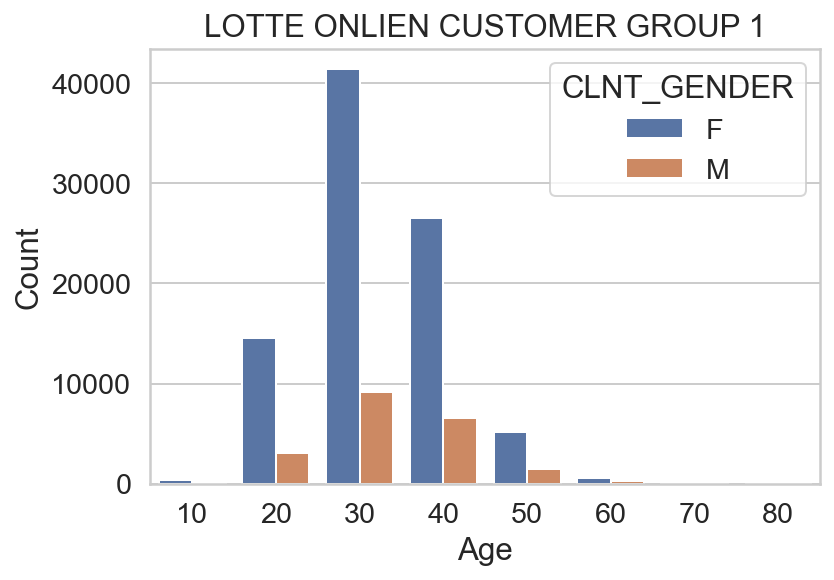

In [252]:
# 그룹1

grid = plt.subplots()

grid = sns.countplot('CLNT_AGE', data=group1 , hue='CLNT_GENDER')

grid.set_title('LOTTE ONLIEN CUSTOMER GROUP 1')
grid.set_xlabel('Age')
grid.set_ylabel('Count')

plt.show()

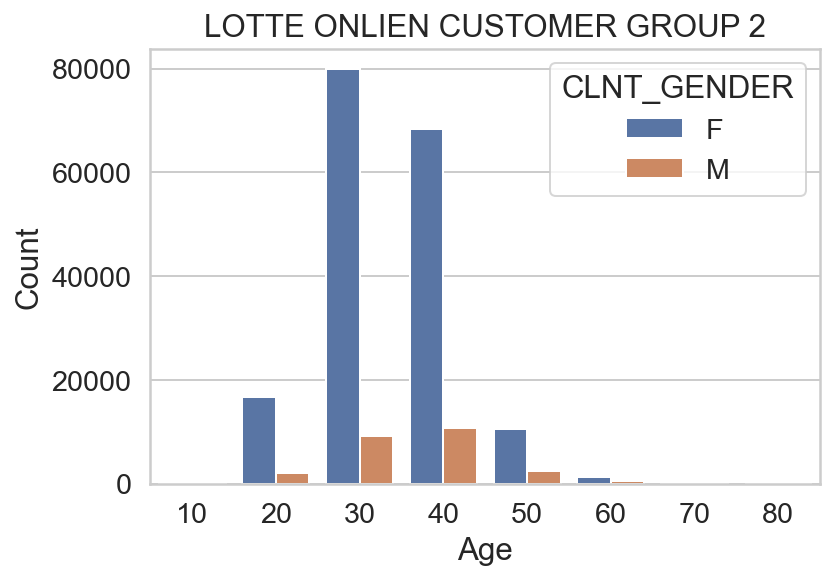

In [253]:
# 그룹2

grid = plt.subplots()

grid = sns.countplot('CLNT_AGE', data=group2 , hue='CLNT_GENDER')

grid.set_title('LOTTE ONLIEN CUSTOMER GROUP 2')
grid.set_xlabel('Age')
grid.set_ylabel('Count')

plt.show()

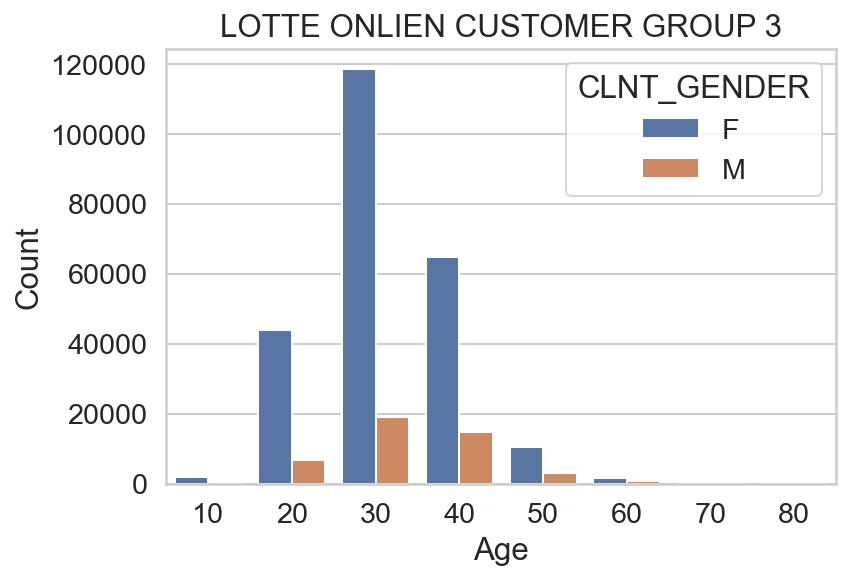

In [254]:
# 그룹3

grid = plt.subplots()

grid = sns.countplot('CLNT_AGE', data=group3 , hue='CLNT_GENDER')

grid.set_title('LOTTE ONLIEN CUSTOMER GROUP 3')
grid.set_xlabel('Age')
grid.set_ylabel('Count')

plt.show()

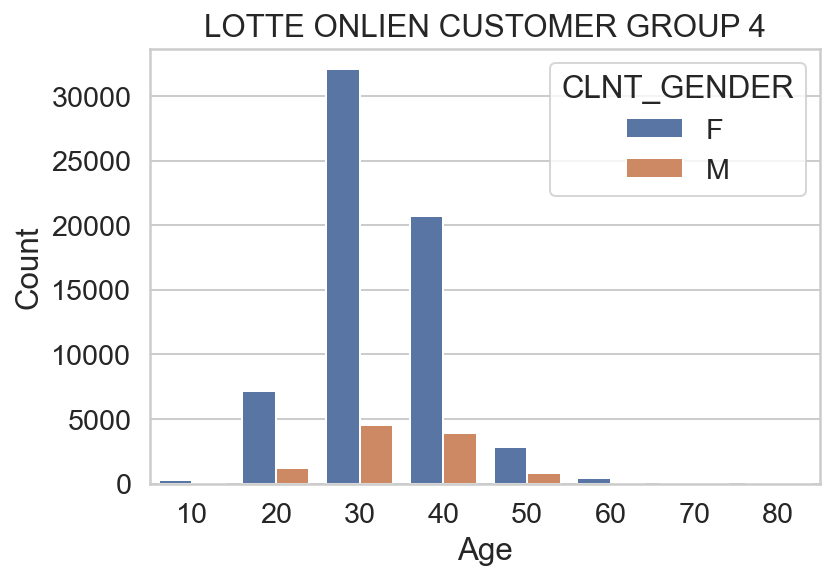

In [255]:
# 그룹4

grid = plt.subplots()

grid = sns.countplot('CLNT_AGE', data=group4 , hue='CLNT_GENDER')

grid.set_title('LOTTE ONLIEN CUSTOMER GROUP 4')
grid.set_xlabel('Age')
grid.set_ylabel('Count')

plt.show()

- 모든 그룹에서 30대 여성, 40대 여성, 20대 여성 순으로 구매자 수가 가장 많았음을 확인

### 각 그룹별 고객 파악하기
총구매금액 기준, 구매력이 있는 고객은 남성일까 여성일까?

In [256]:
# 전체 고객에서 남성과 여성의 총구매금액 새로운 데이터프레임 생성

cusbuytot = df_join[['CLNT_ID', 'CLNT_GENDER', 'PD_BUY_TOT']]

cusbuytot.head()

,CLNT_ID,CLNT_GENDER,PD_BUY_TOT
0,4830726,F,260000
1,4830874,F,276000
2,4830975,F,104300
3,4831275,F,71400
4,4825325,F,529700


In [257]:
cusbuytot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 671661 entries, 0 to 671660
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   CLNT_ID      671661 non-null  int64 
 1   CLNT_GENDER  671661 non-null  object
 2   PD_BUY_TOT   671661 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 20.5+ MB


In [258]:
print(cusbuytot[cusbuytot['CLNT_GENDER'] == 'F'].sum())
print('----------------------------------------------------------')
print(cusbuytot[cusbuytot['CLNT_GENDER'] == 'M'].sum())

CLNT_ID                                            1924231202695
CLNT_GENDER    FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF...
PD_BUY_TOT                                          179794063190
dtype: object
----------------------------------------------------------
CLNT_ID                                             339670785509
CLNT_GENDER    MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...
PD_BUY_TOT                                           31235932801
dtype: object


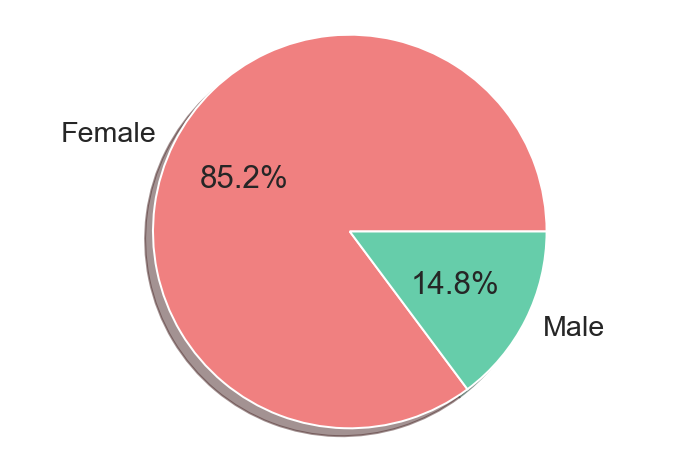

In [259]:
# 전체 고객에서 총구매금액 기준 구매력 있는 성별 확인 파이 차트

labels = 'Female', 'Male'
sizes = [179794063190, 31235932801 ]
explode = (0, 0)
colors = ['lightcoral', 'mediumaquamarine']

frame, grid = plt.subplots()
grid.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
grid.axis('equal')

sns.set(font_scale=1.305)

plt.show()

In [260]:
# 각 그룹별 총구매금액 기준 구매력 있는 성별 확인
# 그룹1

print(group1[group1['CLNT_GENDER'] == 'F'].sum())
print('----------------------------------------------------------')
print(group1[group1['CLNT_GENDER'] == 'M'].sum())

CLNT_ID                                             300882306199
CLNT_GENDER    FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF...
CLNT_AGE                                                 2898960
PD_BUY_TOT                                           34058297010
BUY_COUNT                                                 211296
CUS_SEG                                                    88693
dtype: object
----------------------------------------------------------
CLNT_ID                                              69734791757
CLNT_GENDER    MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...
CLNT_AGE                                                  690520
PD_BUY_TOT                                            9647924730
BUY_COUNT                                                  47924
CUS_SEG                                                    20670
dtype: object


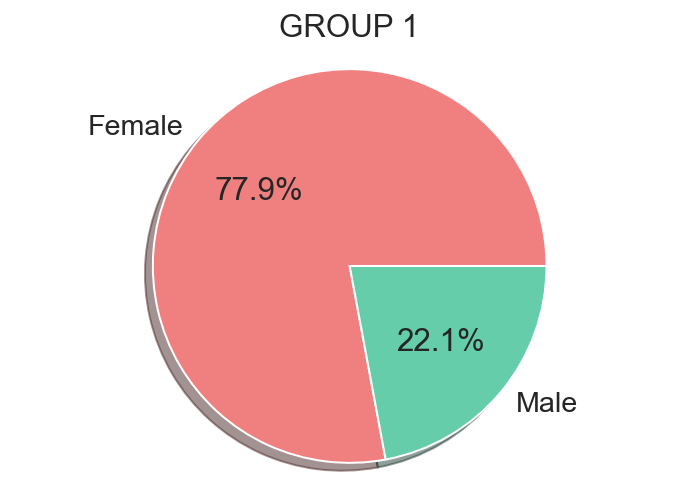

In [261]:
# 그룹1 총구매금액 기준 구매력 있는 성별 확인 파이 차트

labels = 'Female', 'Male'
sizes = [34058297010, 9647924730]
explode = (0, 0)
colors = ['lightcoral', 'mediumaquamarine']

frame, grid = plt.subplots()
grid.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
grid.axis('equal')
plt.title('GROUP 1')

sns.set(font_scale=1.305)

plt.show()

In [262]:
# 각 그룹별 총구매금액 기준 구매력 있는 성별 확인
# 그룹2

print(group2[group2['CLNT_GENDER'] == 'F'].sum())
print('----------------------------------------------------------')
print(group2[group2['CLNT_GENDER'] == 'M'].sum())

CLNT_ID                                             600451175287
CLNT_GENDER    FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF...
CLNT_AGE                                                 6078570
PD_BUY_TOT                                          122281811470
BUY_COUNT                                                2405418
CUS_SEG                                                   354300
dtype: object
----------------------------------------------------------
CLNT_ID                                              84107119633
CLNT_GENDER    MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...
CLNT_AGE                                                  896150
PD_BUY_TOT                                           17502953121
BUY_COUNT                                                 293911
CUS_SEG                                                    49830
dtype: object


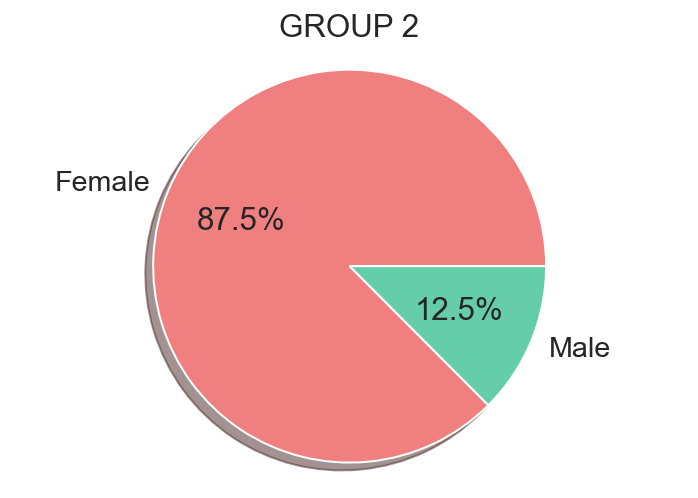

In [263]:
# 그룹2 총구매금액 기준 구매력 있는 성별 확인 파이 차트

labels = 'Female', 'Male'
sizes = [122281811470, 17502953121]
explode = (0, 0)
colors = ['lightcoral', 'mediumaquamarine']

frame, grid = plt.subplots()
grid.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
grid.axis('equal')
plt.title('GROUP 2')

sns.set(font_scale=1.305)

plt.show()

In [264]:
# 각 그룹별 총구매금액 기준 구매력 있는 성별 확인
# 그룹3

print(group3[group3['CLNT_GENDER'] == 'F'].sum())
print('----------------------------------------------------------')
print(group3[group3['CLNT_GENDER'] == 'M'].sum())

CLNT_ID                                             808129605903
CLNT_GENDER    FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF...
CLNT_AGE                                                 7669200
PD_BUY_TOT                                           17469200090
BUY_COUNT                                                 535490
CUS_SEG                                                   723879
dtype: object
----------------------------------------------------------
CLNT_ID                                             149921577290
CLNT_GENDER    MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...
CLNT_AGE                                                 1497520
PD_BUY_TOT                                            3112859180
BUY_COUNT                                                  97797
CUS_SEG                                                   134103
dtype: object


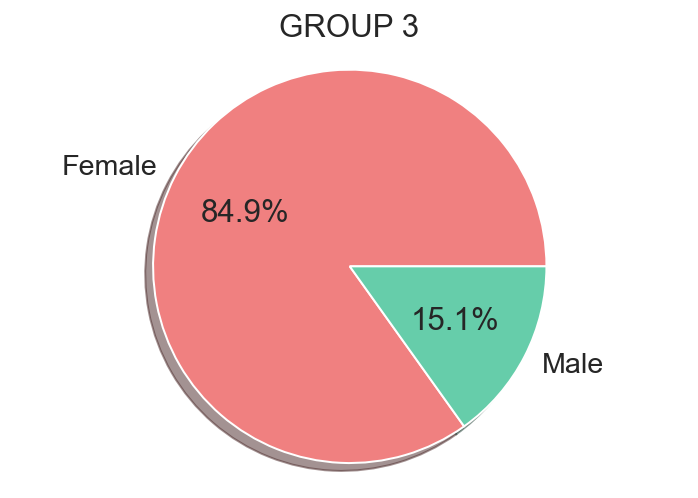

In [265]:
# 그룹3 총구매금액 기준 구매력 있는 성별 확인 파이 차트

labels = 'Female', 'Male'
sizes = [17469200090, 3112859180]
explode = (0, 0)
colors = ['lightcoral', 'mediumaquamarine']

frame, grid = plt.subplots()
grid.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
grid.axis('equal')
plt.title('GROUP 3')

sns.set(font_scale=1.305)

plt.show()

In [266]:
# 각 그룹별 총구매금액 기준 구매력 있는 성별 확인
# 그룹4

print(group4[group4['CLNT_GENDER'] == 'F'].sum())
print('----------------------------------------------------------')
print(group4[group4['CLNT_GENDER'] == 'M'].sum())

CLNT_ID                                             214768115306
CLNT_GENDER    FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF...
CLNT_AGE                                                 2106340
PD_BUY_TOT                                            5984754620
BUY_COUNT                                                 338186
CUS_SEG                                                   253868
dtype: object
----------------------------------------------------------
CLNT_ID                                              35907296829
CLNT_GENDER    MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...
CLNT_AGE                                                  371080
PD_BUY_TOT                                             972195770
BUY_COUNT                                                  57253
CUS_SEG                                                    43088
dtype: object


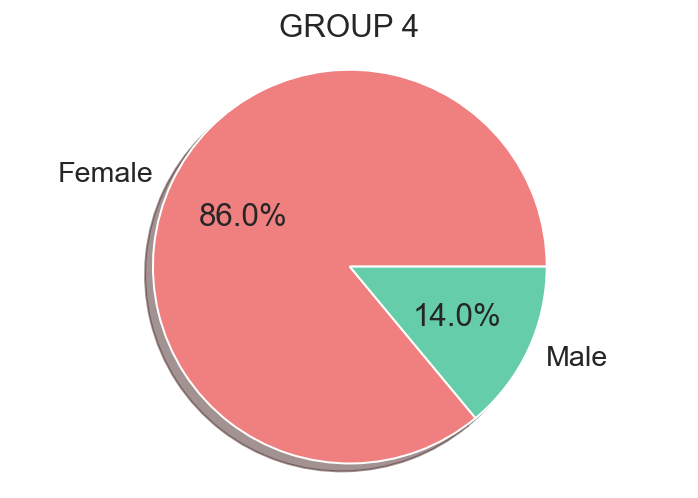

In [267]:
# 그룹4 총구매금액 기준 구매력 있는 성별 확인 파이 차트

labels = 'Female', 'Male'
sizes = [5984754620, 972195770]
explode = (0, 0)
colors = ['lightcoral', 'mediumaquamarine']

frame, grid = plt.subplots()
grid.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
grid.axis('equal')
plt.title('GROUP 4')

sns.set(font_scale=1.305)

plt.show()

- 여성이 85% 정도로 압도적으로 높음 
- 여성의 소비액 또한 남성보다 많음을 확인 할 수 있었음(그룹1인 경우, 남성의 비중이 그룹 2보다 최대 10%p나 차이남)
- 다른 그룹에 비해 남성의 비율이 상대적으로 높았기에 남성의 소비가 차지하는 비중이 다른 그룹보다 높게 형성되어 있음
- 전체적으로 롯데의 주고객이 여성인 것을 알 수 있었음

### 각 그룹별 고객 파악하기
구매횟수 기준, 구매력이 있는 고객은 남성일까 여성일까?

In [268]:
# 전체 고객에서 남성과 여성의 총구매횟수 새로운 데이터프레임 생성

cusbuyc = df_join[['CLNT_ID', 'CLNT_GENDER', 'BUY_COUNT']]

cusbuyc.head()

,CLNT_ID,CLNT_GENDER,BUY_COUNT
0,4830726,F,2
1,4830874,F,4
2,4830975,F,2
3,4831275,F,2
4,4825325,F,11


In [269]:
print(cusbuyc[cusbuyc['CLNT_GENDER'] == 'F'].sum())
print('---------------------------------------------')
print(cusbuyc[cusbuyc['CLNT_GENDER'] == 'M'].sum())

CLNT_ID                                            1924231202695
CLNT_GENDER    FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF...
BUY_COUNT                                                3490390
dtype: object
---------------------------------------------
CLNT_ID                                             339670785509
CLNT_GENDER    MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...
BUY_COUNT                                                 496885
dtype: object


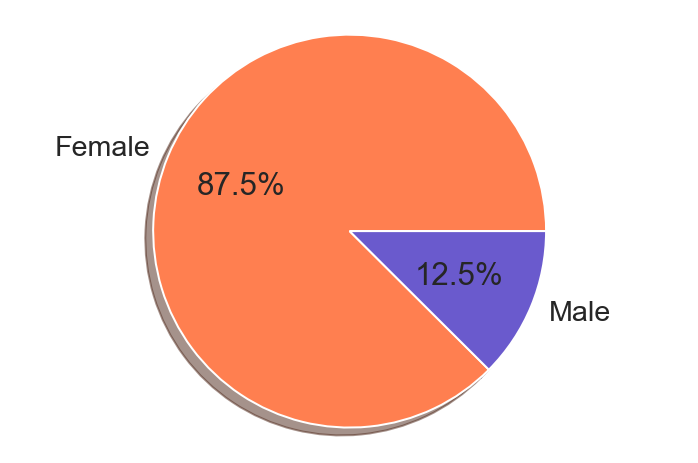

In [270]:
# 전체 고객에서 구매횟수기준 구매력있는 성별 확인 파이차트

labels = 'Female', 'Male'
sizes = [3490390, 496885]
explode = (0, 0)
colors = ['coral', 'slateblue']

frame, grid = plt.subplots()
grid.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
grid.axis('equal')

sns.set(font_scale=1.305)

plt.show()

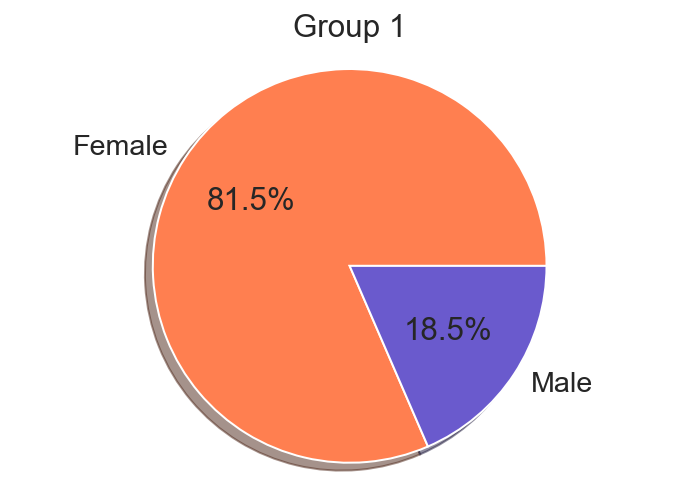

In [271]:
# 각 그룹별 구매횟수 기준 구매력 있는 성별 확인 파이차트
# 그룹1

labels = 'Female', 'Male'
sizes = [211296, 47924]
explode = (0, 0)
colors = ['coral', 'slateblue']

frame, grid = plt.subplots()
grid.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
grid.axis('equal')
plt.title('Group 1')

sns.set(font_scale=1.305)

plt.show()

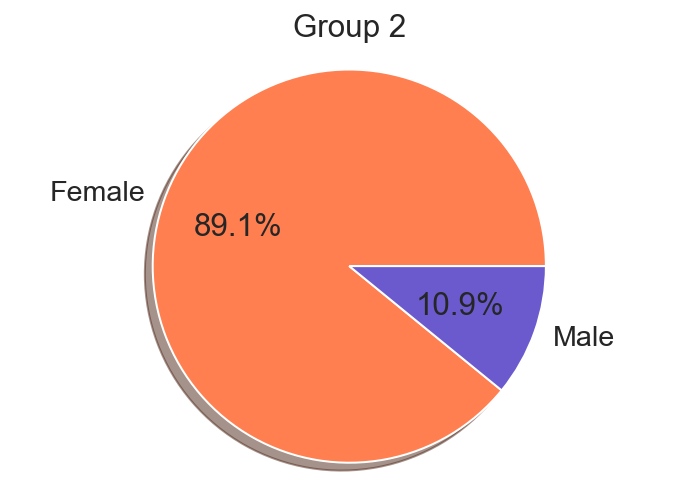

In [272]:
# 각 그룹별 구매횟수 기준 구매력 있는 성별 확인 파이차트
# 그룹2

labels = 'Female', 'Male'
sizes = [2405418, 293911]
explode = (0, 0)
colors = ['coral', 'slateblue']

frame, grid = plt.subplots()
grid.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
grid.axis('equal')
plt.title('Group 2')

sns.set(font_scale=1.305)

plt.show()

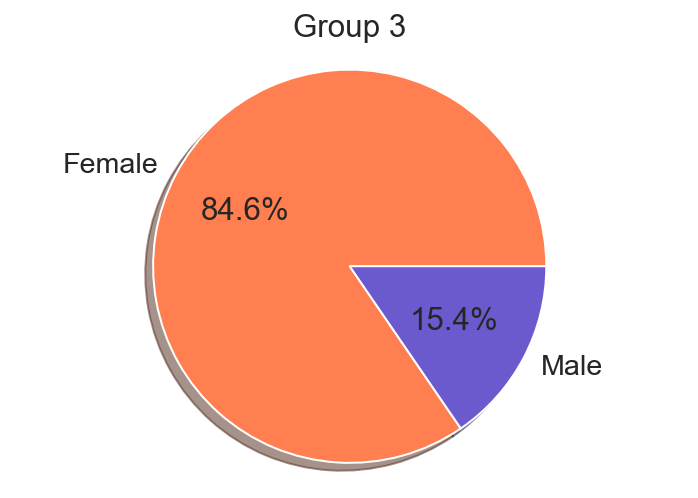

In [273]:
# 각 그룹별 구매횟수 기준 구매력 있는 성별 확인 파이차트
# 그룹3

labels = 'Female', 'Male'
sizes = [535490, 97797]
explode = (0, 0)
colors = ['coral', 'slateblue']

frame, grid = plt.subplots()
grid.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
grid.axis('equal')
plt.title('Group 3')

sns.set(font_scale=1.305)

plt.show()

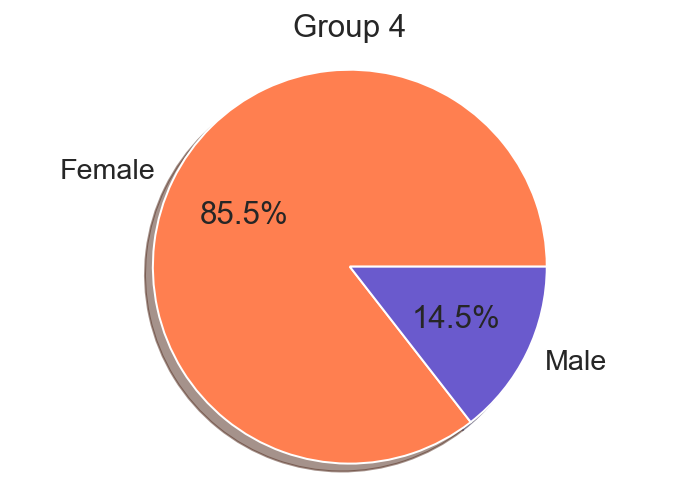

In [274]:
# 각 그룹별 구매횟수 기준 구매력 있는 성별 확인 파이차트
# 그룹4

labels = 'Female', 'Male'
sizes = [338186, 57253]
explode = (0, 0)
colors = ['coral', 'slateblue']

frame, grid = plt.subplots()
grid.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
grid.axis('equal')
plt.title('Group 4')

sns.set(font_scale=1.305)

plt.show()

- 여성이 롯데 온라인 플랫폼에서 소비하는 횟수 또한 남성보다 많음을 확인 87.5% 

### 각 그룹별 고객 파악하기
고객들은 어떤 디바이스로 롯데 온라인 쇼핑을 즐길까?

In [275]:
# 결측치 확인 및 삭제
# 결측치 개수 확인

df_sess.isnull().sum()

CLNT_ID                0
SESS_ID                0
SESS_SEQ               0
SESS_DT                0
TOT_PAG_VIEW_CT      274
TOT_SESS_HR_V      14202
DVC_CTG_NM             0
ZON_NM                 0
CITY_NM                0
dtype: int64

In [276]:
# 결측치 데이터 제외

df_sess = df_sess.dropna()

In [277]:
df_sess = df_sess.merge(df_segs, left_on='CLNT_ID', right_on='CLNT_ID')

In [278]:
# 1. datetime 변환
#데이터 형 변환 - 실패 

df_sess.SESS_DT.astype('datetime64[ns]')

0         1970-01-01 00:00:00.020180509
1         1970-01-01 00:00:00.020180611
2         1970-01-01 00:00:00.020180624
3         1970-01-01 00:00:00.020180913
4         1970-01-01 00:00:00.020180412
                       ...             
2698659   1970-01-01 00:00:00.020180518
2698660   1970-01-01 00:00:00.020180824
2698661   1970-01-01 00:00:00.020180415
2698662   1970-01-01 00:00:00.020180516
2698663   1970-01-01 00:00:00.020180926
Name: SESS_DT, Length: 2698664, dtype: datetime64[ns]

In [279]:
# 문자열로 우선 바꾸고, 날짜로 인식가능하게 문자열 규칙 정해주기   

df_sess.SESS_DT = df_sess.SESS_DT.astype(str) # str로 바꿀수 있음...
df_sess.SESS_DT.dtype

dtype('O')

In [280]:
# 세션일자 형변환 완료

df_sess.SESS_DT = df_sess.SESS_DT.astype('datetime64[ns]')
df_sess.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2698664 entries, 0 to 2698663
Data columns (total 12 columns):
 #   Column           Dtype         
---  ------           -----         
 0   CLNT_ID          int64         
 1   SESS_ID          int64         
 2   SESS_SEQ         int64         
 3   SESS_DT          datetime64[ns]
 4   TOT_PAG_VIEW_CT  float64       
 5   TOT_SESS_HR_V    object        
 6   DVC_CTG_NM       object        
 7   ZON_NM           object        
 8   CITY_NM          object        
 9   PD_BUY_TOT       int64         
 10  BUY_COUNT        int64         
 11  CUS_SEG          int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 267.7+ MB


In [281]:
# 2. float 타입으로 변경 (결측치 때문에 일괄 float로 변경 필요)

df_sess.TOT_PAG_VIEW_CT.astype(float)
df_sess.TOT_SESS_HR_V = df_sess.TOT_SESS_HR_V.str.replace(',','').astype(float)


- 전체 고객 및 그룹별 디바이스 사용 비중 확인

In [282]:
# 관측치 값 확인

df_sess.DVC_CTG_NM.unique()

array(['mobile', 'desktop', 'tablet'], dtype=object)

In [283]:
mobile = (df_sess[df_sess.DVC_CTG_NM == 'mobile'].count() / df_sess.DVC_CTG_NM.count() * 100)[0]
desktop = (df_sess[df_sess.DVC_CTG_NM == 'desktop'].count() / df_sess.DVC_CTG_NM.count() * 100)[0]
tablet = (df_sess[df_sess.DVC_CTG_NM == 'tablet'].count() / df_sess.DVC_CTG_NM.count() * 100)[0]

In [284]:
pp(mobile)
pp(desktop)
pp(tablet)

84.38712637067823
15.168283269054614
0.44459036026715437


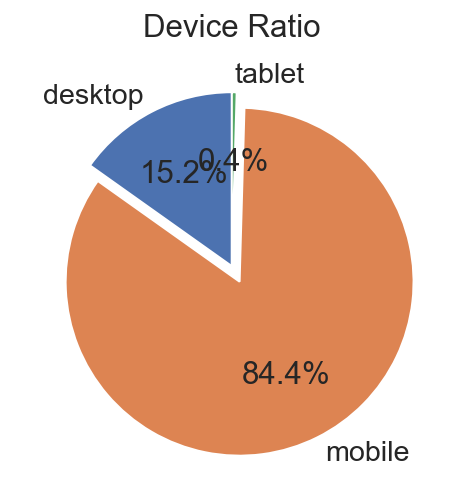

In [285]:
# 전체 구매자의 디바이스 사용 비중

frame, grid = plt.subplots()

labels = 'desktop', 'mobile', 'tablet'
sizes = [desktop, mobile, tablet]
explode = (0, 0.1, 0)
grid.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title("Device Ratio")
plt.show()

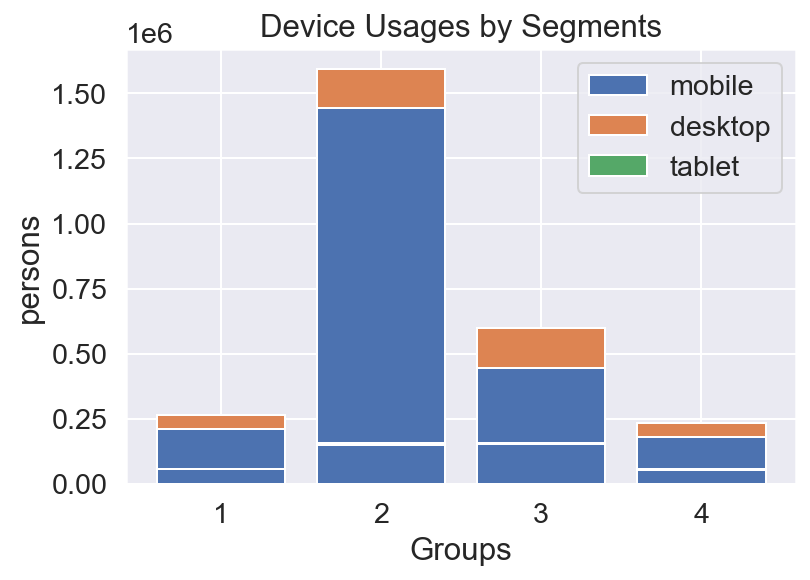

In [286]:
# 그룹별 디바이스 사용 비중 바 차트 

grouped_device = df_sess.groupby(['DVC_CTG_NM','CUS_SEG'])['CUS_SEG'].count()

labels = ['1', '2', '3', '4']
mobile = grouped_device['mobile']
desktop = grouped_device['desktop']
tablet = grouped_device['tablet']

width = 0.8        

fig, ax = plt.subplots()

ax.bar(labels, mobile, width, label='mobile')
ax.bar(labels, desktop, width,  bottom=mobile,label='desktop')
ax.bar(labels, tablet, width,  bottom=desktop,label='tablet')

ax.set_title('Device Usages by Segments')
ax.set_xlabel('Groups')
ax.set_ylabel('persons')

ax.legend()

plt.show()

In [287]:
# 그룹별 디바이스 사용 수 - 100% 비율로 보기 
# 데이터 프레임 만들기

df = pd.DataFrame(df_sess.groupby('CUS_SEG')['CUS_SEG'].count())
df['mobile'] = grouped_device['mobile'] / df.CUS_SEG * 100 
df['desktop'] = grouped_device['desktop'] / df.CUS_SEG * 100 
df['tablet'] = grouped_device['tablet'] / df.CUS_SEG * 100 
df

,CUS_SEG,mobile,desktop,tablet
CUS_SEG,,,,
1,264494,78.884209,20.706708,0.409083
2,1599114,90.227151,9.351053,0.421796
3,599497,74.280939,25.237824,0.481237
4,235559,76.640672,22.813393,0.545935


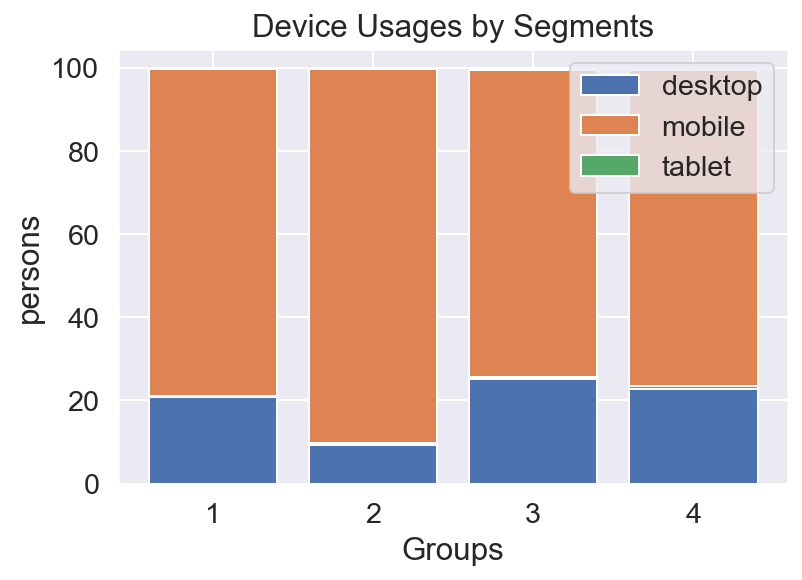

In [288]:
labels = ['1', '2', '3', '4']
mobile = df.mobile
desktop = df.desktop
tablet = df.tablet

width = 0.8        

fig, ax = plt.subplots()


ax.bar(labels, desktop, width,  label='desktop')
ax.bar(labels, mobile, width, bottom=desktop, label='mobile')
ax.bar(labels, tablet, width, bottom=desktop, label='tablet')


ax.set_title('Device Usages by Segments')
ax.set_xlabel('Groups')
ax.set_ylabel('persons')

ax.legend()

plt.show()

- 모바일>데스크탑>태블릿 순으로 접속 비율이 높음을 확인
- → 모바일 기기의 보편화 등 여러 가능한 이유가 있겠지만 롯데 고객군은 모바일로 언제, 어디서나 편리하게 쇼핑을 하고자 하는 그룹으로 예상
- → 롯데가 모바일 쇼핑 환경을 만드려는 데에 좋은 환경이 마련되어 있음을 유추  
- 파이차트는 그룹별 크기를 바로 비교하기에는 쉽지 않아서, 그룹바 차트를 100%로 늘려서 확인해 본 결과 그룹2에서 모바일 사용 비중이 가장 높음을 확인
- → 시간과 장소의 제약 없이 쇼핑을 즐기며 쇼핑을 자주하는 그룹으로 형성되어 있을 것으로 예상

### 각 그룹별 고객 파악하기
재구매율은 얼마나 될까? (재방문 구매자 파악)

In [289]:
sess_seq_min = df_sess.groupby('CLNT_ID')['SESS_SEQ'].min()
sess_seq_min

CLNT_ID
8            2
14           5
25         111
32          99
33           2
          ... 
6592537     96
6592544      1
6592551    331
6592553      2
6592554      1
Name: SESS_SEQ, Length: 921926, dtype: int64

In [290]:
# 재방문자 행추출 
r = df_sess[df_sess['SESS_SEQ'] > 1 ]
revisitors = r.groupby('CLNT_ID')['SESS_SEQ'].min()

# 방문자 행추출 
v = df_sess[df_sess['SESS_SEQ'] <= 1 ]
visitors = v.groupby('CLNT_ID')['SESS_SEQ'].min()

# 신규/재방문자 수 변수 정의 
visitors = visitors.count()
revisitors = revisitors.count()

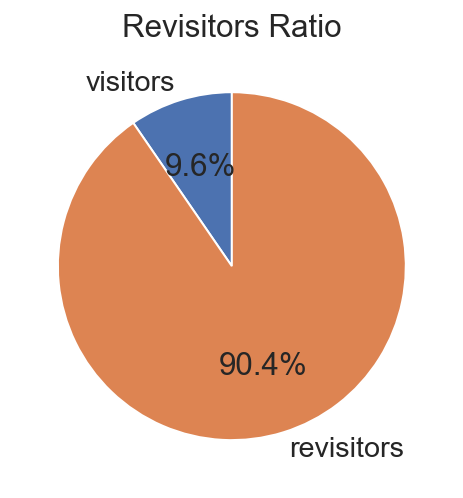

In [291]:
#신규/재방문율 그래프 그리기 - pie chart

frame, grid = plt.subplots()

labels = 'visitors', 'revisitors'
sizes = [visitors, revisitors]

grid.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title("Revisitors Ratio")

plt.show()

- 데이터 수집 기간 내 재구매한 고객의 비중이 전체 평균 기준 90%대여서 매우 높은 수치임을 확인 
- 엘포인트를 사용하는 롯데 고객은 재방문 비율이 높아 어느정도 서비스에 만족한다고 볼 수 있음 → 그러나, 신규 사용자의 비율이 너무 낮아 신규 사용자의 유입을 높일 필요가 있어 보임

### 구매 행동 패턴 발견하기
고객들은 한 번 구매할 때 얼마나 오랫동안 쇼핑할까?
(그룹별 평균 세션 시간)

In [297]:
# 클라이언트별 평균 세션시간 = sh_cid
sh_cid = df_sess.groupby('CLNT_ID')['TOT_SESS_HR_V'].mean()
sh_cid = sh_cid.reset_index()
sh_cid = sh_cid.merge(df_sess, left_on='CLNT_ID', right_on='CLNT_ID', suffixes=('_x', '_y'))

In [298]:
# 분단위로 변경 
sh_cid['TOT_SESS_HR_V_x'] = sh_cid.TOT_SESS_HR_V_x/60  

In [299]:
# 데이터 확인 
sh_cid.head()

,CLNT_ID,TOT_SESS_HR_V_x,SESS_ID,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V_y,DVC_CTG_NM,ZON_NM,CITY_NM,PD_BUY_TOT,BUY_COUNT,CUS_SEG
0,8,6.950000,6964877,7,2018-06-06,38.0,366.0,mobile,Gyeonggi-do,Gwangmyeong-si,76000,2,3
1,8,6.950000,7017688,2,2018-06-05,55.0,468.0,mobile,Seoul,Seoul,76000,2,3
2,14,118.300000,1156991,5,2018-09-11,256.0,7098.0,mobile,Gyeonggi-do,Ansan-si,69800,2,3
3,25,11.441667,8113243,160,2018-05-18,28.0,1540.0,desktop,Gyeonggi-do,Osan-si,270800,4,2
4,25,11.441667,6059256,204,2018-06-21,7.0,99.0,desktop,Gyeonggi-do,Osan-si,270800,4,2


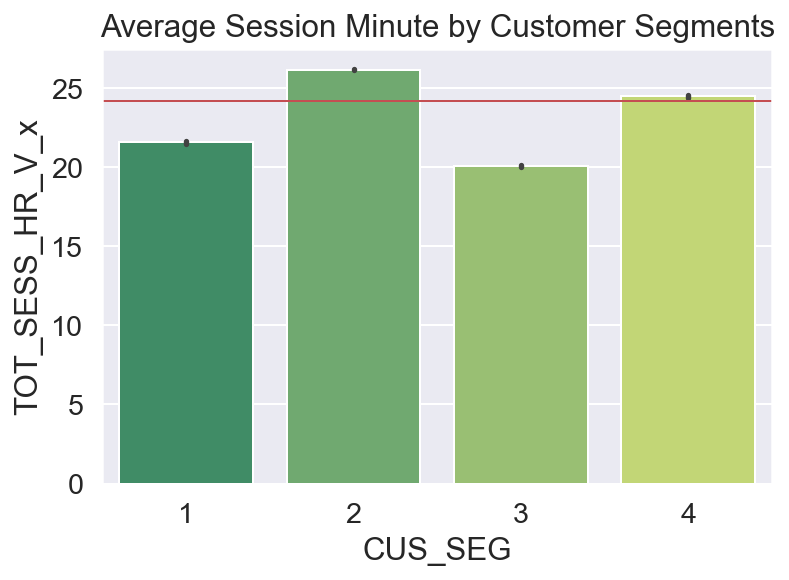

In [300]:
#그룹별 및 전체 평균 PV 조회수 그래프 그리기

frame, grid = plt.subplots()

grid = sns.barplot(x='CUS_SEG', y='TOT_SESS_HR_V_x', data=sh_cid, palette='summer')
grid = plt.axhline(y=sh_cid.TOT_SESS_HR_V_x.mean(), color='r', linewidth=1)

plt.title("Average Session Minute by Customer Segments")

plt.show()

- 전체 평균은 24.19분이었고, 구매횟수가 높은 그룹이 평균 이상으로 나와 세션 시간 또한 구매횟수가 높은 그룹과 관련있어 보임
- 그룹1과 3에서 세션 시간이 평균 이하인 것으로 보아 온라인 행동이 적극적이지 않음을 파악 =>네이버와 같은 다른 사이트에서 검색을 주로 하다가 롯데몰에 들어와서 구매만 하는 그룹으로 구성되어 있지 않을까?
- 반면, 그룹2와 그룹4는 세션시간이 평균 이상인 것으로 보아 탐색적 온라인 행동을 많이 한 것으로 확인
- 전체 평균은 24분으로, 롯데 고객은 한번 방문해서 구매할 때 약 24분 정도의 쇼핑을 하는 것을 알 수 있음 
- =>구매횟수가 높은 그룹이 평균 이상인 결과가 나와서, 쇼핑에 매우 적극적인 그룹으로 유추할 수 있음



### 구매 행동 패턴 발견하기
구매자는 평균 몇 페이지를 탐색할까?
(그룹별 평균 페이지뷰 조회수 파악)

In [301]:
# 클라이언트별 평균 pv 조회수 = pv_cid
pv_cid = df_sess.groupby('CLNT_ID')['TOT_PAG_VIEW_CT'].mean()
pv_cid = pv_cid.reset_index()
pv_cid = pv_cid.merge(df_sess, left_on='CLNT_ID', right_on='CLNT_ID', suffixes=('_x', '_y'))

In [302]:
# 조인 결과 확인 
pv_cid.columns

Index(['CLNT_ID', 'TOT_PAG_VIEW_CT_x', 'SESS_ID', 'SESS_SEQ', 'SESS_DT',
       'TOT_PAG_VIEW_CT_y', 'TOT_SESS_HR_V', 'DVC_CTG_NM', 'ZON_NM', 'CITY_NM',
       'PD_BUY_TOT', 'BUY_COUNT', 'CUS_SEG'],
      dtype='object')

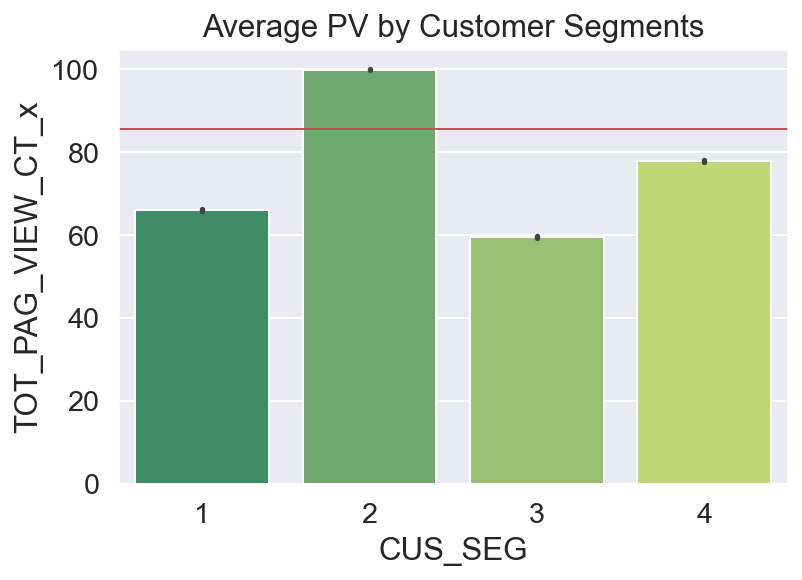

In [303]:
#그룹별 및 전체 평균 PV 조회수 그래프 그리기
frame, grid = plt.subplots()

grid = sns.barplot(x='CUS_SEG', y='TOT_PAG_VIEW_CT_x', data=pv_cid, palette='summer')
grid = plt.axhline(y=pv_cid.TOT_PAG_VIEW_CT_x.mean(), color='r', linewidth=1)

plt.title("Average PV by Customer Segments")

plt.show()

- 전체 평균은 85.6페이지로, 롯데 고객은 약 85페이지를 약 24분 동안 탐색한 후 구매를 하는 것임
- 구매 금액과 상관없이 구매횟수가 적은 그룹(그룹1과 3)의 방문당 페이지 조회수가 낮은 것으로 나타나, 페이지 조회수가 높을수록 구매횟수에 연관이 있어보이는 것을 확인 